In [2]:
# Lab 3, predicting types of movement using accelerometer data

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
"""
https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer


Dataset Information
   --- Data are separated by participant
   --- Each file contains the following information
       ---- sequential number, x acceleration, y acceleration, z acceleration, label 
   --- Labels are codified by numbers
       --- 1: Working at Computer
       --- 2: Standing Up, Walking and Going up\down stairs
       --- 3: Standing
       --- 4: Walking
       --- 5: Going Up\Down Stairs
       --- 6: Walking and Talking with Someone
       --- 7: Talking while Standing
"""

In [4]:
accel = pd.read_csv('../data/accelerometer_1.csv', header=None) # there is no header column

In [5]:
accel.head()

,0,1,2,3,4
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1


In [6]:
accel.shape

(162501, 5)

In [ ]:
# Beginner Level

In [7]:
# 0. This dataframe has no headers, change that so the column names are
# ['id', 'x', 'y', 'z', 'label']
accel.columns = ['id', 'x', 'y', 'z', 'label']

In [8]:
accel.head()

,id,x,y,z,label
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1


In [9]:
# 1. Do we have any missing values?
accel.isnull().values.any()

False

In [ ]:
# 2. print the value counts for the albel column of accel


In [10]:
# 3. Remove any rows where the label column is not 1 - 7
accel = accel.drop(accel[accel.label > 7].index)
accel = accel.drop(accel[accel.label < 1].index)

In [11]:
accel['label'].value_counts()

7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
Name: label, dtype: int64

In [12]:
# 4. replace the numbers in the label column with the word counterpart:
    # example 1's become 'Working at Computer', 4's become "Walking"
accel.loc[accel['label'] == 1, 'label'] = 'Working at Computer'
accel.loc[accel['label'] == 2, 'label'] = 'Standing Up, Walking and Going up\down stairs'
accel.loc[accel['label'] == 3, 'label'] = 'Standing'
accel.loc[accel['label'] == 4, 'label'] = 'Walking'
accel.loc[accel['label'] == 5, 'label'] = 'Going Up\Down Stairs'
accel.loc[accel['label'] == 6, 'label'] = 'Walking and Talking with Someone'
accel.loc[accel['label'] == 7, 'label'] = 'Talking while Standing'



In [13]:
accel.head()

,id,x,y,z,label
0,0.0,1502,2215,2153,Working at Computer
1,1.0,1667,2072,2047,Working at Computer
2,2.0,1611,1957,1906,Working at Computer
3,3.0,1601,1939,1831,Working at Computer
4,4.0,1643,1965,1879,Working at Computer


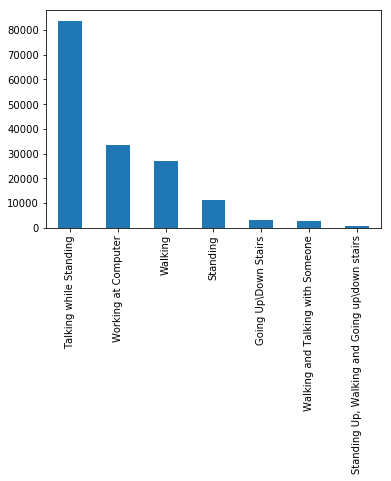

In [14]:
# 5. Plot the number of times each label occurs using a bar char
accel['label'].value_counts().plot(kind='bar')

In [ ]:
# 6. Talking while Standing is the most common label, 
# what is the null accuracy rate for this data set
# The null accuracy is equal to the number of times the most 
# common response element occurs divided by the total number of rows
# Talking while Standing                           0.515372

In [ ]:
# 7. Make an X and a y variable with X being only the x, y, and z columns
# while y is the label column


In [ ]:
# 8. Fit a KNN model with 3 neighbors and print the accuracy of that model
# Did you do better than the null model?



In [ ]:
# 9. print the accuracy of predicting the label column using each column individually
# Ie fit 3 different KNN models, 
# a KNN model with K=3 for each of the x, y, and z columns


In [ ]:
# Intermediate Level

In [ ]:
# 10. Create a list called scores that holds 29 different accuracys, 
# one for each value of K between 1 and 29
# Use all three columns for each model
scores = []


In [ ]:
# 11. Make a graph that plots the number of K on the x axis and the accuracy of a KNN model on the y axis


In [ ]:
# Why do you think that the accuracy keeps going down? We will discuss this phenomenom more on Wednesday

In [ ]:
# ADVANCED Level

In [ ]:
# 12. create a new dataframe called X_scaled which
# is the scaled version of the X dataframe

X_scaled[:5,] # first five rows

In [ ]:
# not scaled

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
knn.score(X, y)

In [ ]:
# not scaled

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)
knn.score(X_scaled, y)

In [ ]:
# 13. Why do you think there was very little difference?

In [ ]:
# 14. binarize the response (turn it into a binary response problem)
# create a new column called "binary_label" which is either "stationary", "mobile
# "binary_label is "stationary" if the person is stationary (1, 3, 7)
# "binary_label is "mobile" if the person is mobile (2, 4, 5, 6)


In [ ]:
accel.head()

In [ ]:
# 15. find the null accuracy of the new binary problem

# stationary    0.791409

In [ ]:
# 16. create a new variable, "y_binary" which is the binary_label column


In [ ]:
# 17. Fit a KNN with K=3 to this binary problem and print out the accuracy
